QTM 350 Final Project Data Analysis

Katherine Martini

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('final-project-data.csv', encoding='cp1252')

region_mapping = {
    'Argentina': 'South America',
    'Belize': 'Central America',
    'Costa Rica': 'Central America',
    'El Salvador': 'Central America',
    'Guatemala': 'Central America',
    'Honduras': 'Central America',
    'Nicaragua': 'Central America',
    'Panama': 'Central America',
    'Mexico': 'Central America',
    'Bolivia': 'South America',
    'Brazil': 'South America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Ecuador': 'South America',
    'Guyana': 'South America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Suriname': 'South America',
    'Uruguay': 'South America',
    'Venezuela, RB': 'South America',
    'Cuba': 'Caribbean',
    'Dominican Republic': 'Caribbean',
    'Haiti': 'Caribbean',
    'Jamaica': 'Caribbean',
    'St. Martin (French part)': 'Caribbean',
    'Puerto Rico': 'Caribbean',
}

df['Region'] = df['Country Name'].map(region_mapping)

In [25]:
life_expectancy_df = df[df['Series Name'] == 'Life expectancy at birth, total (years)'].copy()
year_columns = [col for col in df.columns if '[YR' in col]
life_expectancy_df.loc[:, year_columns] = life_expectancy_df[year_columns].apply(pd.to_numeric, errors='coerce')
life_expectancy_df['Average Life Expectancy'] = life_expectancy_df[year_columns].mean(axis=1)

life_result = life_expectancy_df[['Region', 'Average Life Expectancy']]
life_result = life_result.dropna(subset=['Average Life Expectancy'])
life_result = life_result.groupby('Region')['Average Life Expectancy'].mean().reset_index()
life_result = life_result.sort_values(by='Average Life Expectancy', ascending=False)
print(life_result)

            Region Average Life Expectancy
0        Caribbean               70.697967
2    South America               69.356007
1  Central America               68.988212


In [24]:
mortality_df = df[df['Series Name'] == 'Mortality rate, under-5 (per 1,000 live births)'].copy()
mortality_df.loc[:, year_columns] = mortality_df[year_columns].apply(pd.to_numeric, errors='coerce')
mortality_df['Average Mortality Under 5 yo'] = mortality_df[year_columns].mean(axis=1)

mort_result = mortality_df[['Region', 'Average Mortality Under 5 yo']]
mort_result = mort_result.dropna(subset=['Average Mortality Under 5 yo'])
mort_result = mort_result.groupby('Region')['Average Mortality Under 5 yo'].mean().reset_index()
mort_result = mort_result.sort_values(by='Average Mortality Under 5 yo', ascending=False)
print(mort_result)

            Region Average Mortality Under 5 yo
0        Caribbean                    61.526531
1  Central America                    41.316837
2    South America                    40.174876


In [23]:
fertility_df = df[df['Series Name'] == 'Adolescent fertility rate (births per 1,000 women ages 15-19)'].copy()
fertility_df.loc[:, year_columns] = fertility_df[year_columns].apply(pd.to_numeric, errors='coerce')
fertility_df['Average Fertility Rate'] = fertility_df[year_columns].mean(axis=1)

fertility_result = fertility_df[['Region', 'Average Fertility Rate']]
fertility_result = fertility_result.dropna(subset=['Average Fertility Rate'])
fertility_result = fertility_result.groupby('Region')['Average Fertility Rate'].mean().reset_index()
fertility_result = fertility_result.sort_values(by='Average Fertility Rate', ascending=False)
print(fertility_result)

            Region Average Fertility Rate
1  Central America             100.462635
2    South America              77.902779
0        Caribbean              65.945947


In [22]:
immunization_group = [
    'Immunization, DPT (% of children ages 12-23 months)',
    'Immunization, HepB3 (% of one-year-old children)',
    'Immunization, measles (% of children ages 12-23 months)'
]

immunization_df = df[df['Series Name'].isin(immunization_group)].copy()
immunization_df.loc[:, year_columns] = immunization_df[year_columns].apply(pd.to_numeric, errors='coerce')
immunization_df['Grouped Immunization Average'] = immunization_df[year_columns].mean(axis=1)

immune_result = immunization_df[['Region', 'Grouped Immunization Average']]
immune_result = immune_result.dropna(subset=['Grouped Immunization Average'])
immune_result = immune_result.groupby('Region')['Grouped Immunization Average'].mean().reset_index()
immune_result = immune_result.sort_values(by='Grouped Immunization Average', ascending=False)
print(immune_result)

            Region Grouped Immunization Average
1  Central America                    84.240333
2    South America                    80.869707
0        Caribbean                     74.12531


In [21]:
health_df = df[df['Series Name'] == 'Current health expenditure (% of GDP)'].copy()
health_df.loc[:, year_columns] = health_df[year_columns].apply(pd.to_numeric, errors='coerce')
health_df['Average Health Expenditure'] = health_df[year_columns].mean(axis=1)

health_result = health_df[['Region', 'Average Health Expenditure']]
health_result = health_result.dropna(subset=['Average Health Expenditure'])
health_result = health_result.groupby('Region')['Average Health Expenditure'].mean().reset_index()
health_result = health_result.sort_values(by='Average Health Expenditure', ascending=False)
print(health_result)

            Region Average Health Expenditure
1  Central America                   6.785006
2    South America                   6.429862
0        Caribbean                   6.312227


In [47]:
ranking_merge = life_result.merge(mort_result, on='Region')
ranking_merge = ranking_merge.merge(fertility_result, on='Region')
ranking_merge = ranking_merge.merge(immune_result, on='Region')
ranking_merge = ranking_merge.merge(health_result, on='Region')

ranking_merge['Life Expectancy Rank'] = ranking_merge['Average Life Expectancy'].rank(ascending=False).astype(int)
ranking_merge['Mortality Rank'] = ranking_merge['Average Mortality Under 5 yo'].rank(ascending=True).astype(int)
ranking_merge['Grouped Immunization Rank'] = ranking_merge['Grouped Immunization Average'].rank(ascending=False).astype(int)
ranking_merge['Health Expenditure Rank'] = ranking_merge['Average Health Expenditure'].rank(ascending=False).astype(int)
ranking_merge['Fertility Rank'] = ranking_merge['Average Fertility Rate'].rank(ascending=True).astype(int)

ranking_result = ranking_merge[['Region', 
                            'Life Expectancy Rank', 
                            'Mortality Rank', 
                            'Grouped Immunization Rank', 
                            'Health Expenditure Rank', 
                            'Fertility Rank']]

print(ranking_result.to_markdown(index=False))


| Region          |   Life Expectancy Rank |   Mortality Rank |   Grouped Immunization Rank |   Health Expenditure Rank |   Fertility Rank |
|:----------------|-----------------------:|-----------------:|----------------------------:|--------------------------:|-----------------:|
| Caribbean       |                      1 |                3 |                           3 |                         3 |                1 |
| South America   |                      2 |                1 |                           2 |                         2 |                2 |
| Central America |                      3 |                2 |                           1 |                         1 |                3 |


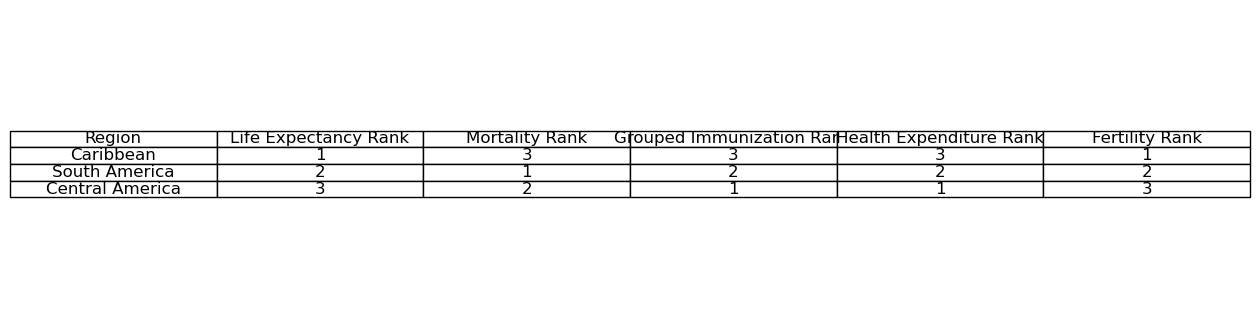

In [46]:

fig, ax = plt.subplots(figsize=(16, 4))  #
ax.axis('off')

table = ax.table(
    cellText=ranking_result.values,
    colLabels=ranking_result.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(12)
plt.savefig('health_region_ranking.png', bbox_inches='tight', dpi=150)
